In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
from draw_functions import *
from kstest import *
import itertools

In [5]:
#read csv
df = pd.read_csv('../csv/Tables_des_ResultCurve_id_1.csv')

#ajout du slope
df['slope'] = df.groupby('ResultCurve_id').apply(lambda group: group['xvalue'].diff() / group['xtime'].diff(), include_groups=False).reset_index(level=0, drop=True)
df_02_08 = df[(df['xtime'] >= 0.2) & (df['xtime'] <= 0.8)]
df

,ResultCurve_id,xtime,xvalue,Batch,Sample_Code,slope
0,1AC7AFE2-D997-47CF-9C8A-02073DFA671B,0.018333,1.095955,025610D,O550GMVVY,NaN
1,1AC7AFE2-D997-47CF-9C8A-02073DFA671B,0.028333,1.141149,025610D,O550GMVVY,4.51940
2,1AC7AFE2-D997-47CF-9C8A-02073DFA671B,0.038333,1.163746,025610D,O550GMVVY,2.25970
3,1AC7AFE2-D997-47CF-9C8A-02073DFA671B,0.048333,1.197641,025610D,O550GMVVY,3.38955
4,1AC7AFE2-D997-47CF-9C8A-02073DFA671B,0.051933,1.185439,025610D,O550GMVVY,-3.38955
...,...,...,...,...,...,...
14036,29B62164-8004-4052-AC78-C72C12247B49,0.733333,3.626819,020205D,O550GMJZW,3.38955
14037,29B62164-8004-4052-AC78-C72C12247B49,0.743333,3.638117,020205D,O550GMJZW,1.12985
14038,29B62164-8004-4052-AC78-C72C12247B49,0.753333,3.672013,020205D,O550GMJZW,3.38955
14039,29B62164-8004-4052-AC78-C72C12247B49,0.763333,3.683311,020205D,O550GMJZW,1.12985


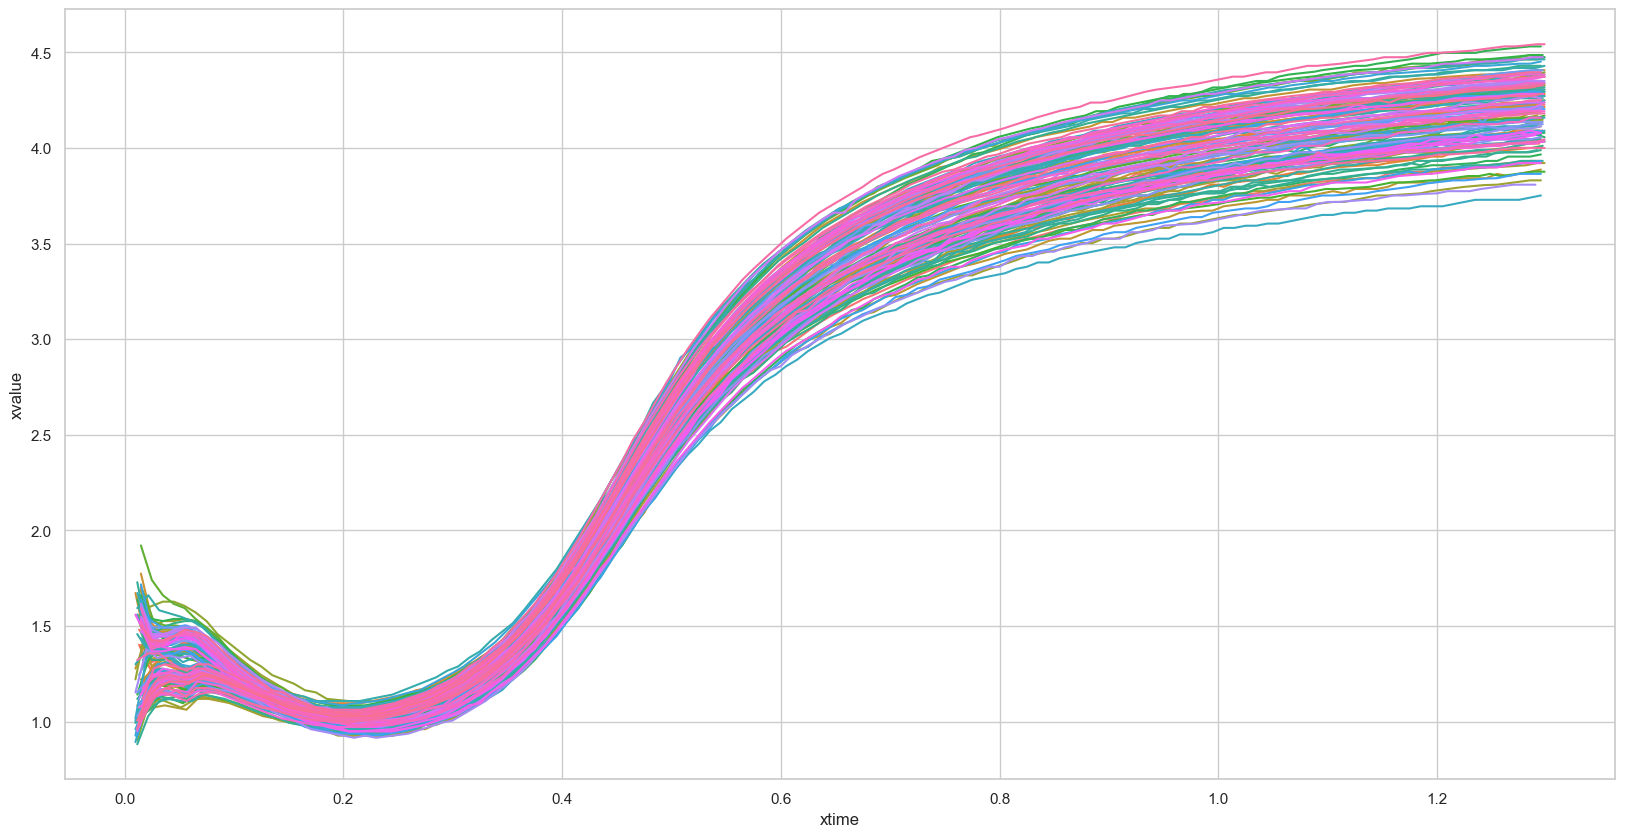

In [40]:
dessiner_commande(df)

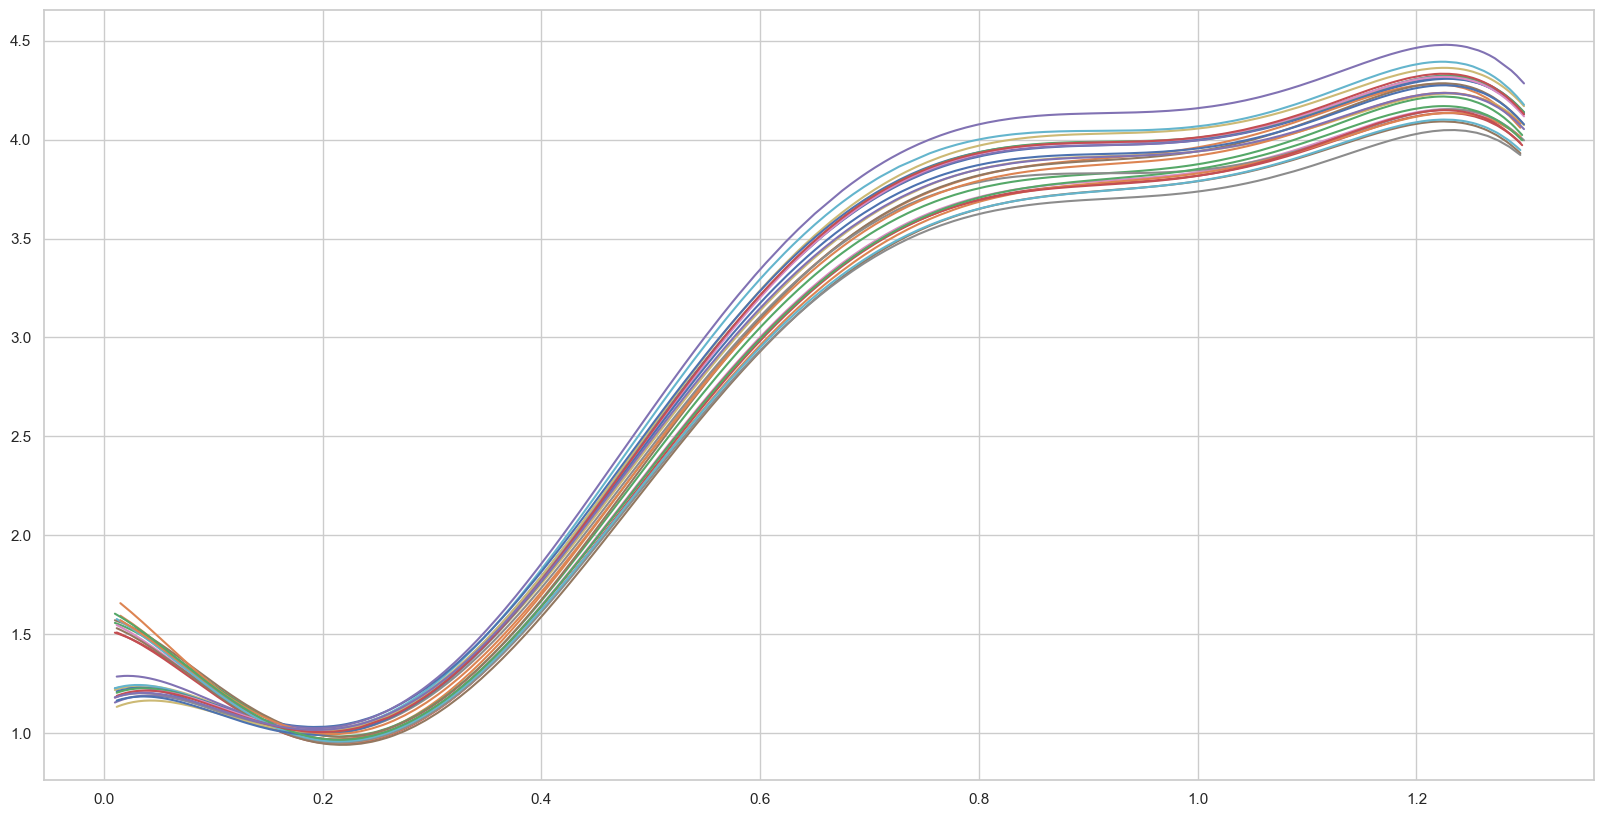

In [41]:
dessiner_commande(df,degree=6)

## Analyse des pentes

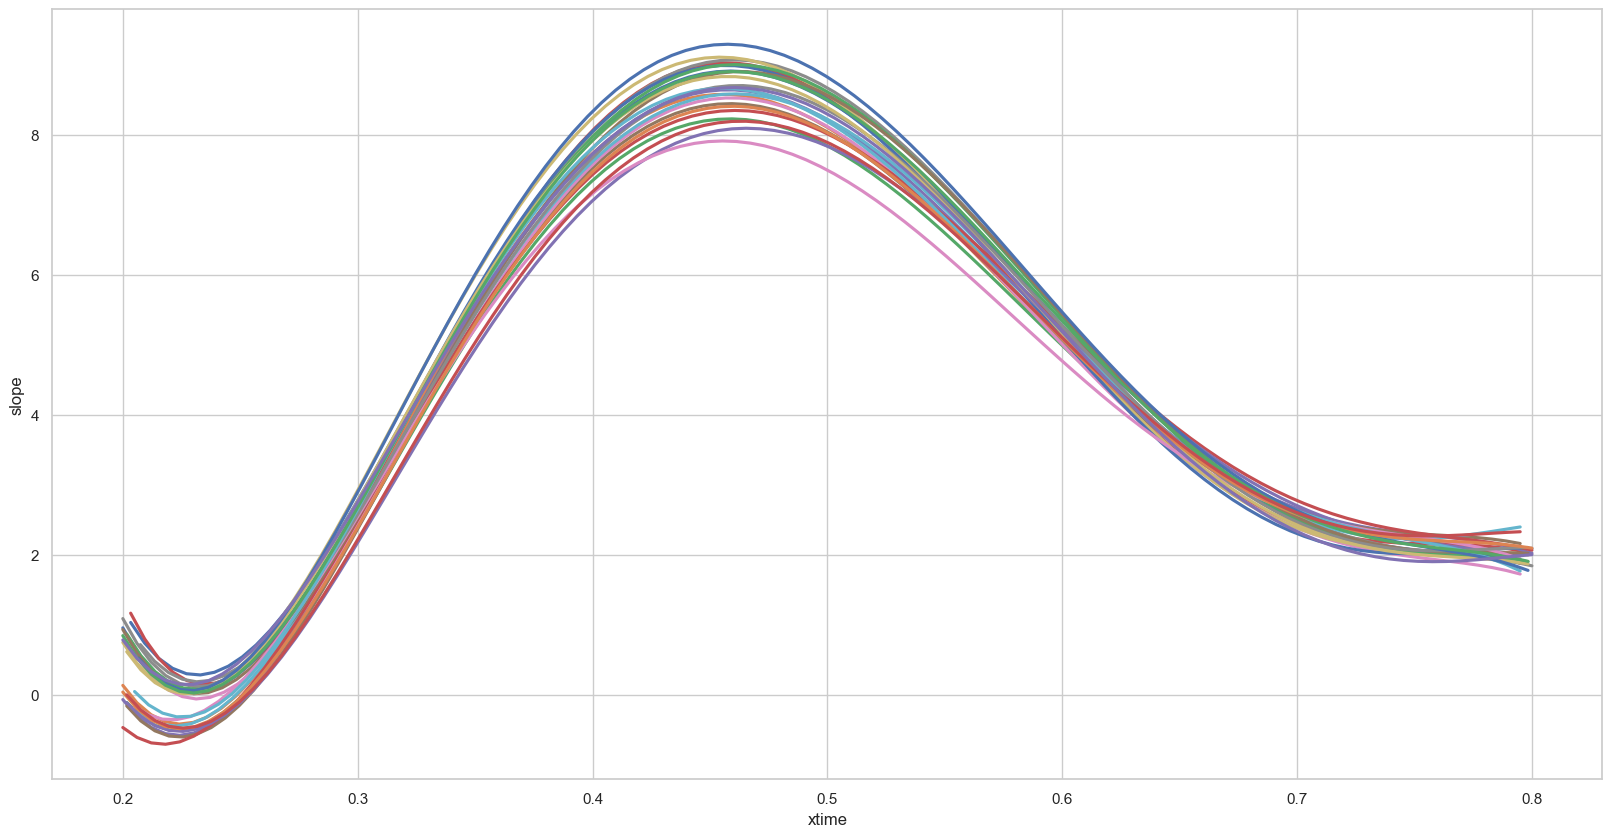

In [4]:
dessiner_commande_slope(df_02_08,5,unified=True)

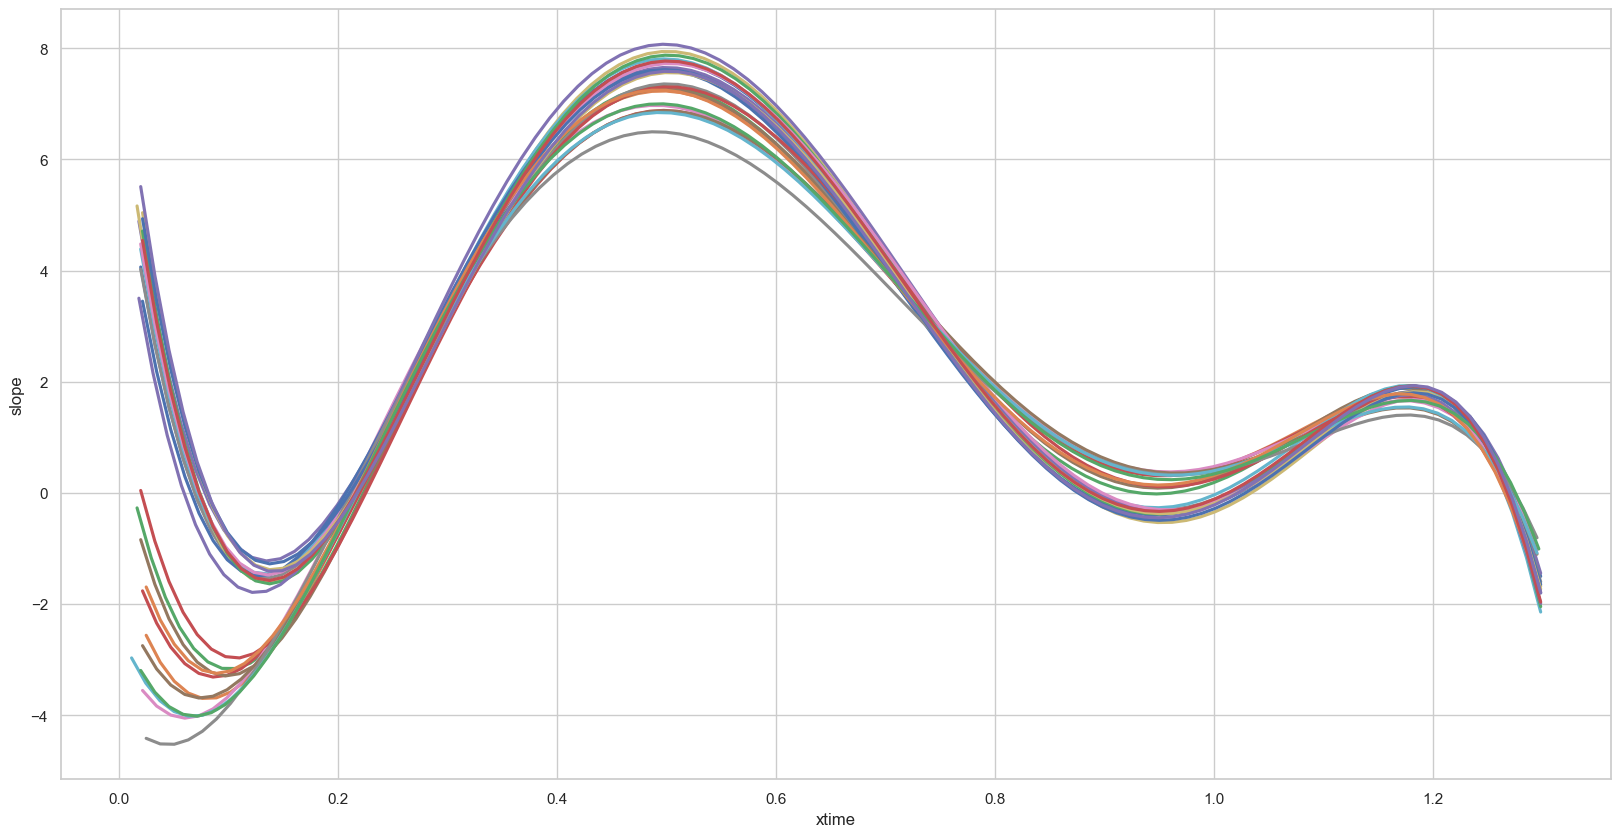

In [47]:
dessiner_commande_slope(df,5,unified=True)

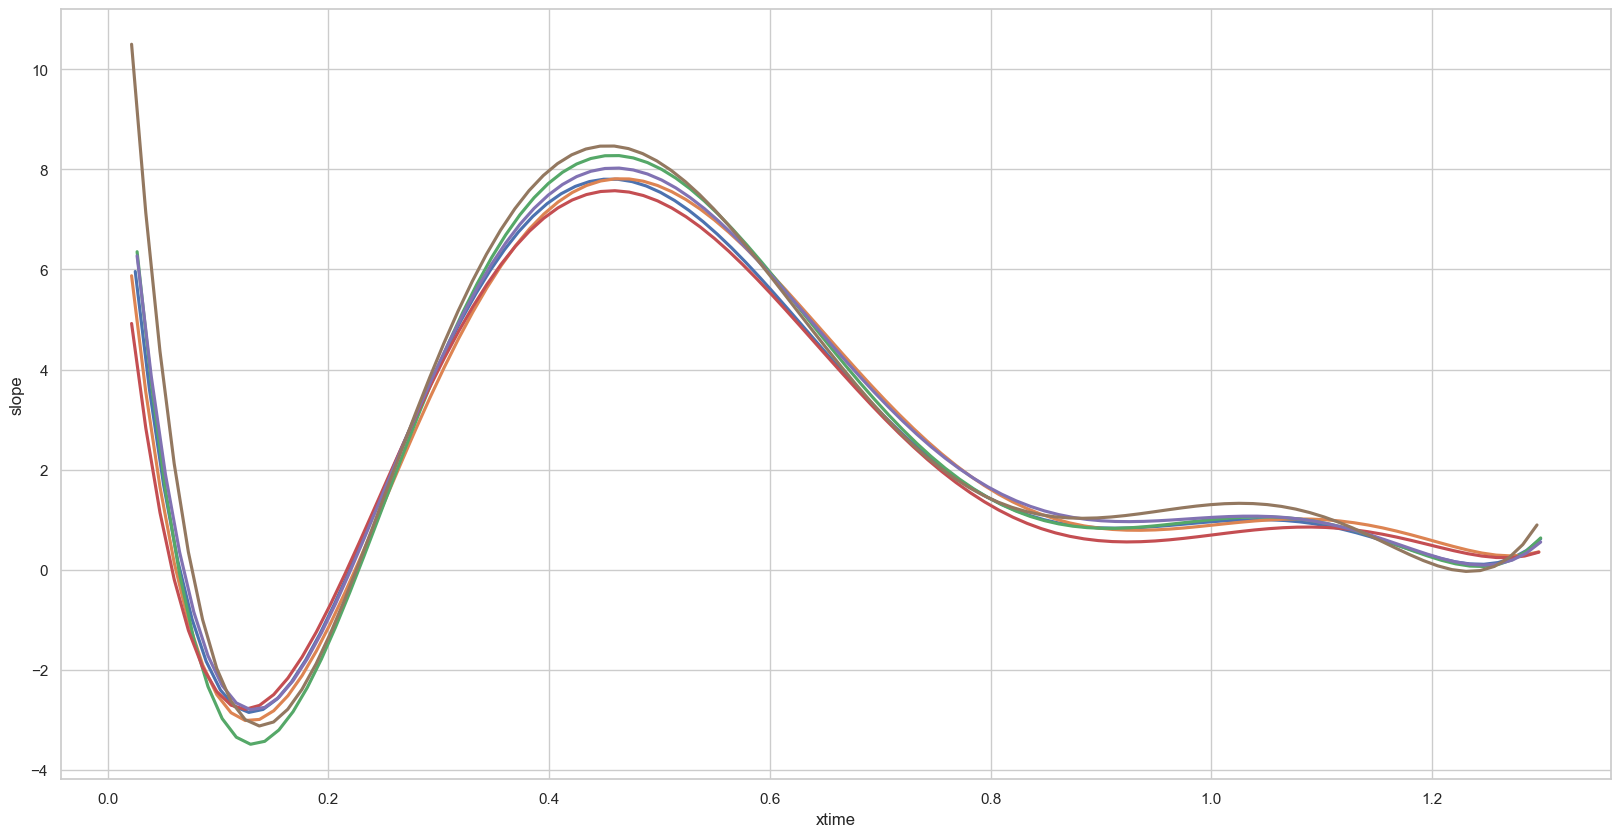

In [48]:
dessiner_batch_slope(df,'030611D', degree=6)

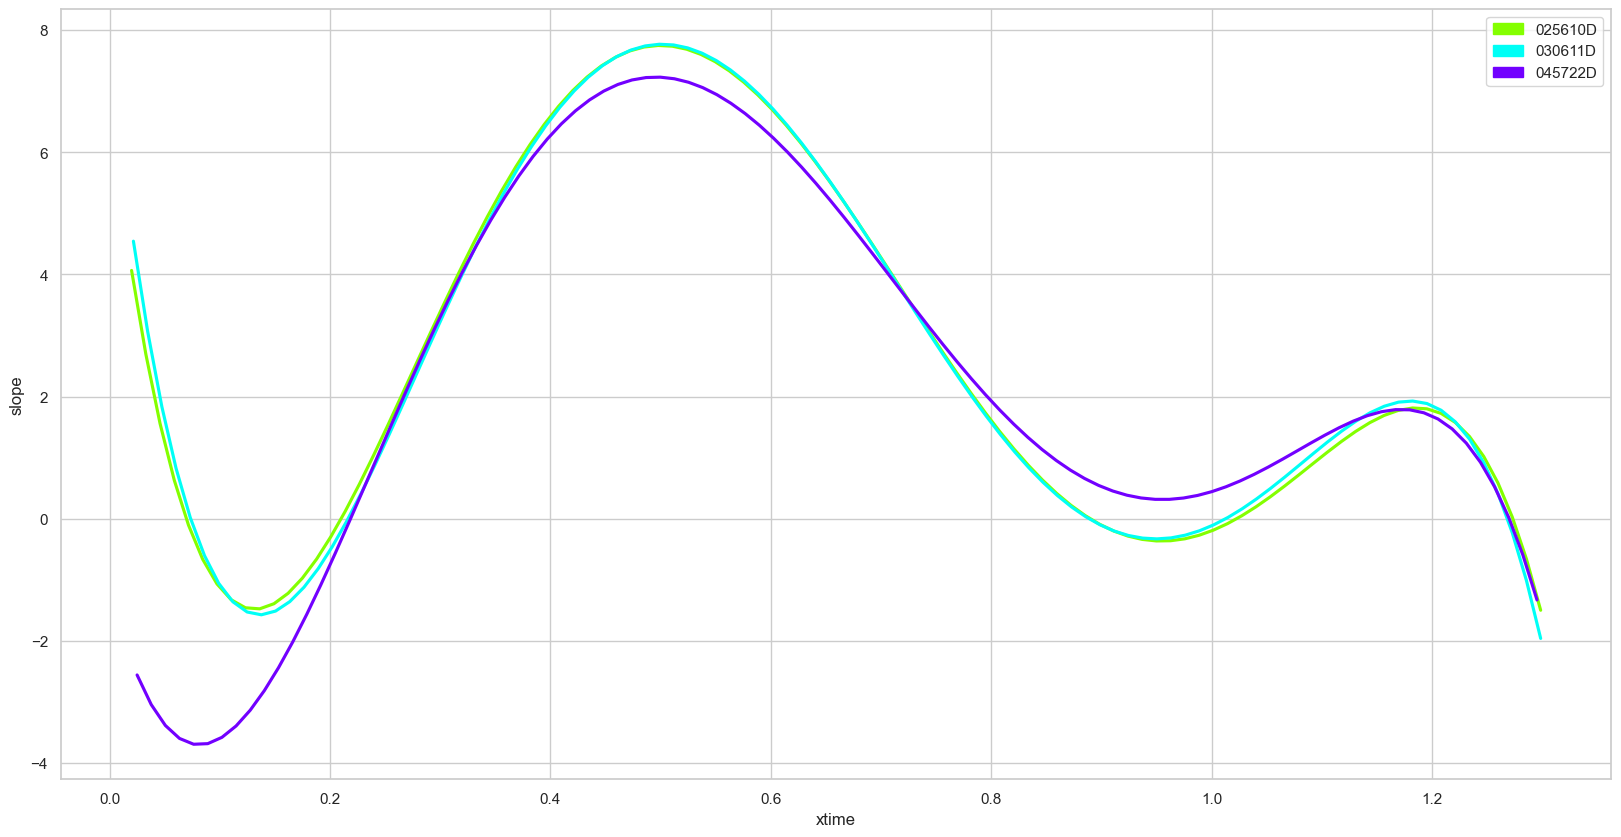

In [49]:
dessiner_batchs_slope(df, ['025610D', '030611D', '045722D'], degree=5, unified=True)

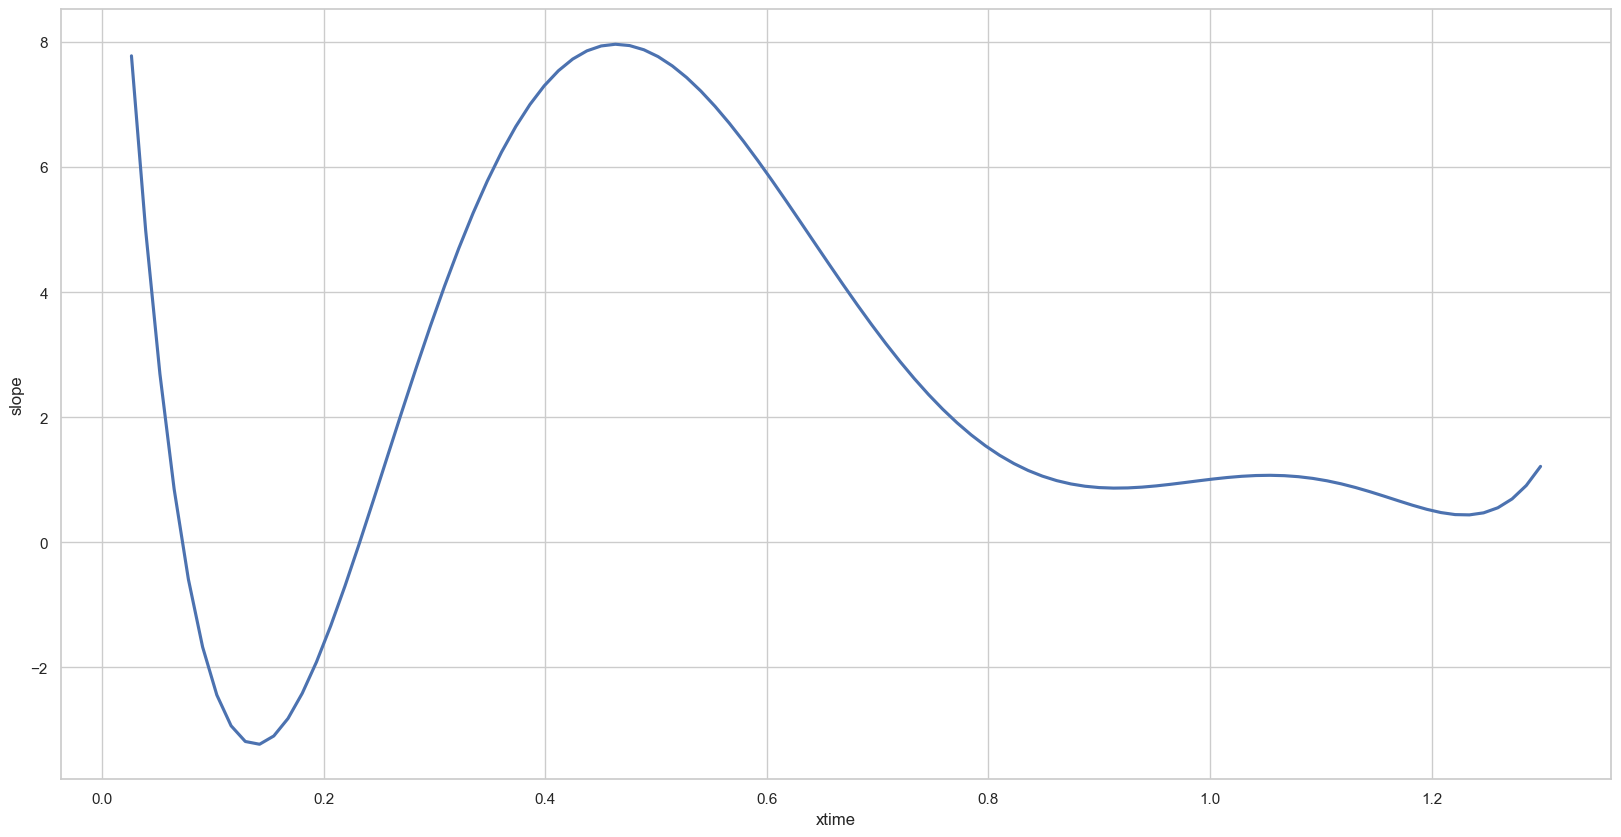

In [50]:
dessiner_sample_slope(df, 'O550GMRBI', degree=6)

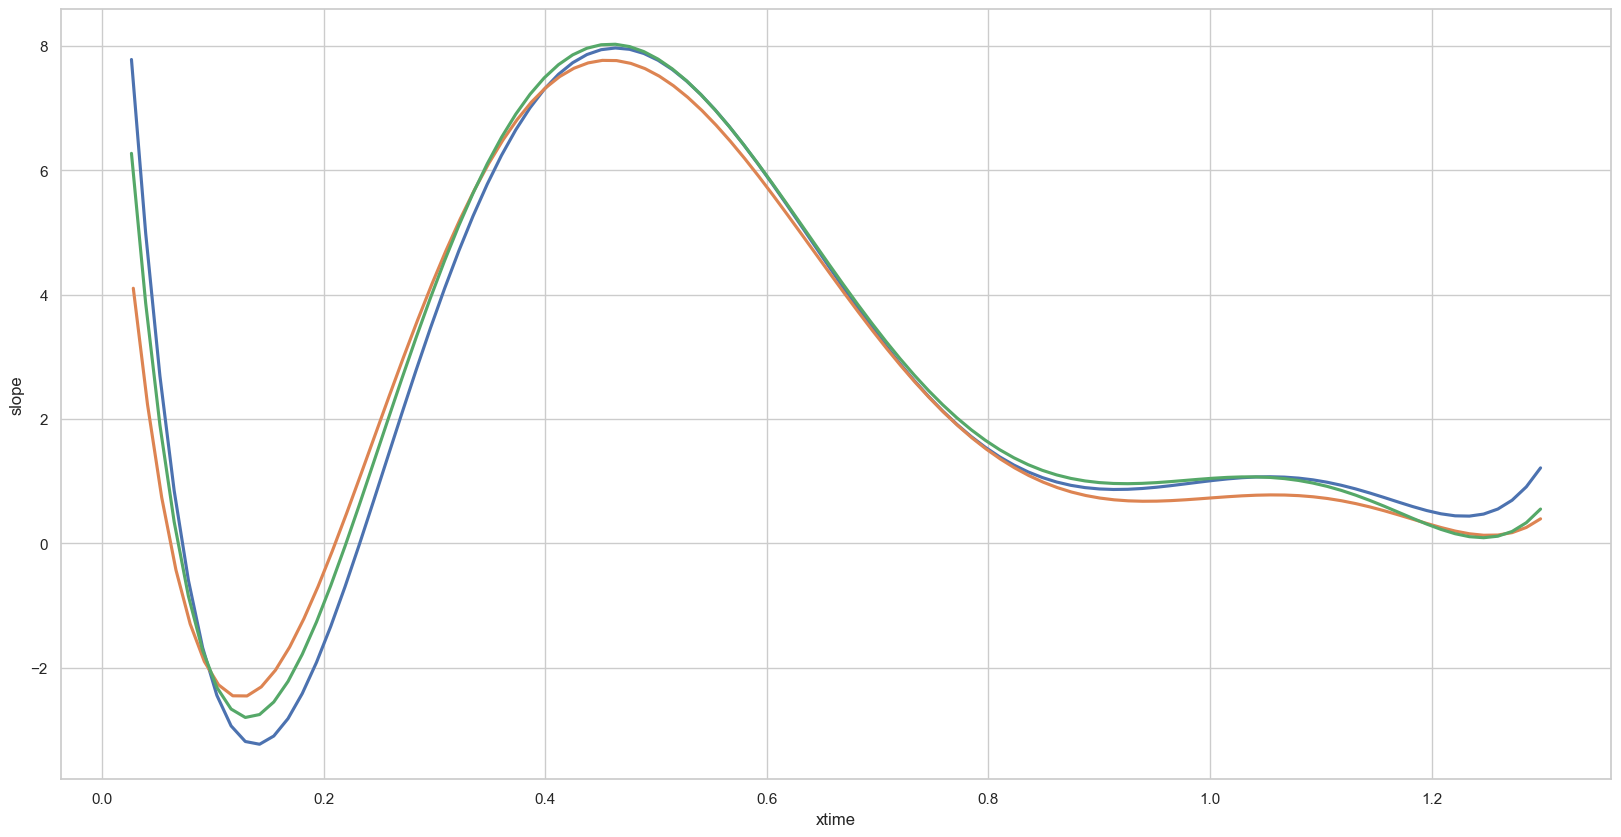

In [51]:
dessiner_samples_slope(df, ['O550GMRBI', 'O550GMVVY', 'O550GMXQ8'], degree=6)

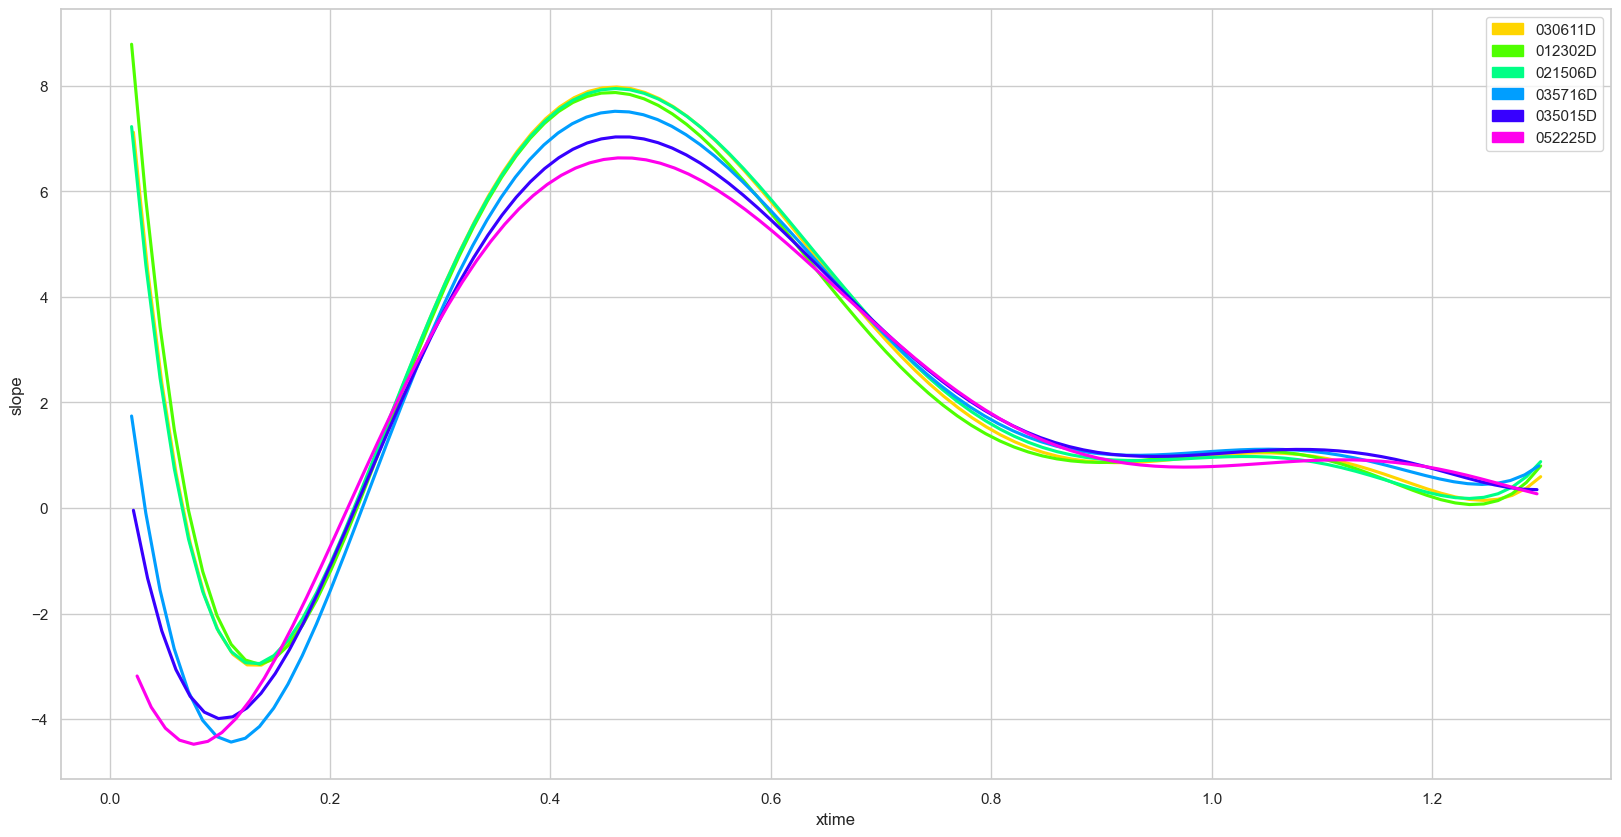

In [53]:
dessiner_batchs_slope(df, ['030611D', '012302D', '021506D', '035716D', '035015D', '052225D'], 6, unified=True)

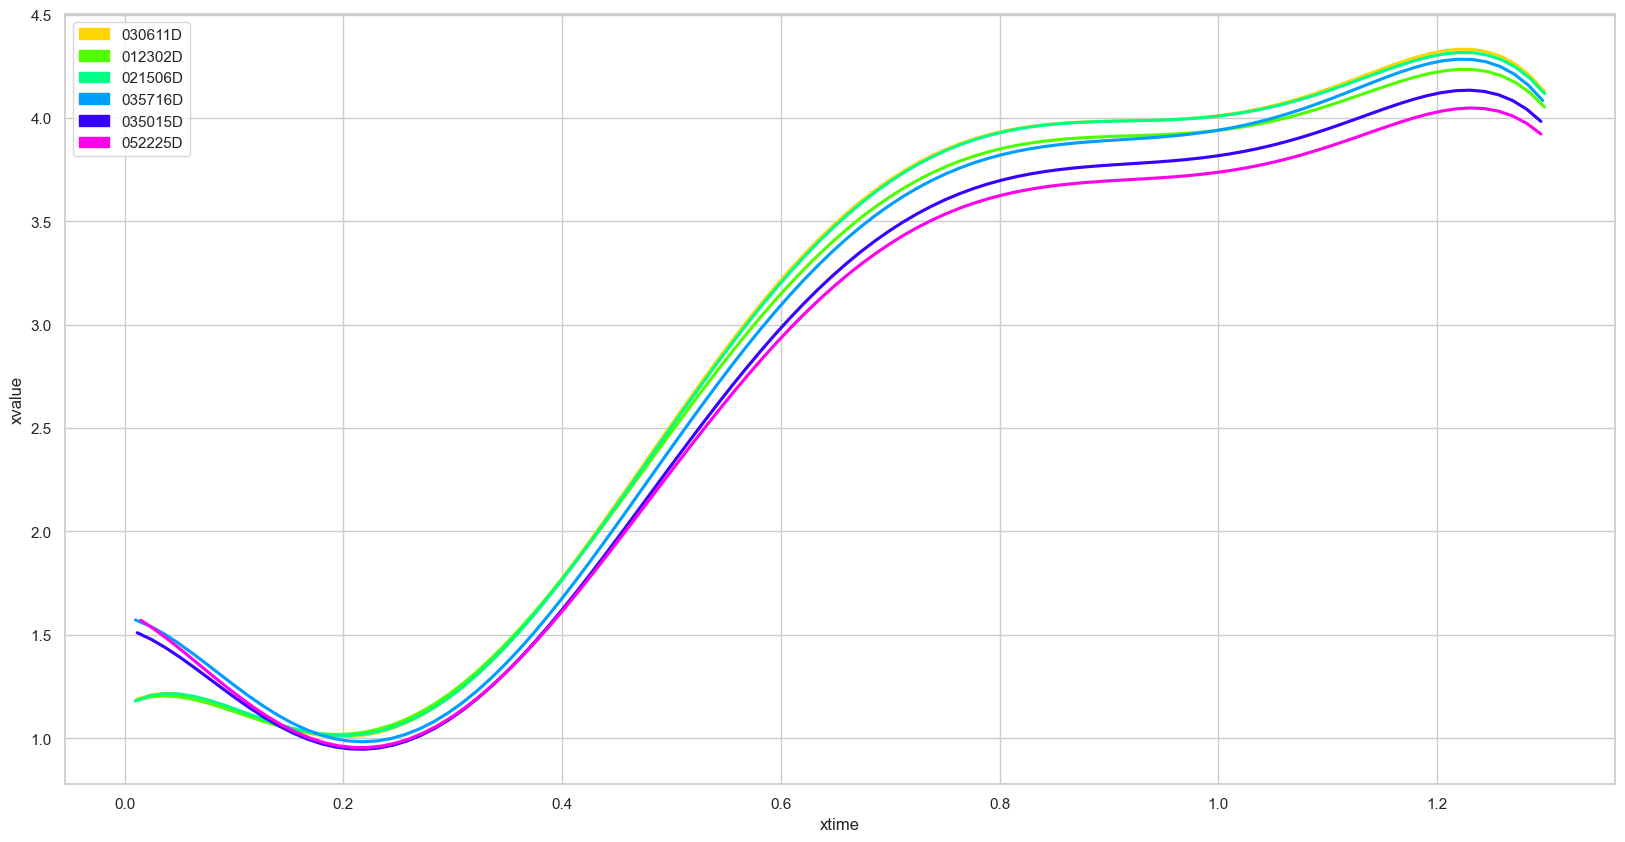

In [55]:
dessiner_batchs(df, ['030611D', '012302D', '021506D', '035716D', '035015D', '052225D'], 6, unified=True)

In [7]:
round(np.std(max_slope_sample_xtime) * 1000, 2)

24.54

In [8]:
round(np.std(max_slope_batch_xtime) * 1000, 2)

10.58

In [13]:
#round xtime to 2 decimal places
df['xtime'] = df['xtime'].round(2)

# Trier le DataFrame par 'xtime' puis par 'xvalue'
df_sorted = df.sort_values(['xtime', 'xvalue'])

# Grouper par 'xtime' et calculer la différence entre deux 'xvalue' consécutifs
df_sorted['xvalue_diff'] = df_sorted.groupby('xtime')['xvalue'].diff().abs()

# Grouper par 'xtime' et exclure la première et la dernière valeur
grouped = df_sorted.groupby('xtime')

# For each group, select all rows except the first and last, then calculate the max
max_diff = grouped.apply(lambda group: group.iloc[1:-1]['xvalue_diff'].max(), include_groups=False)

# Créer une nouvelle DataFrame à partir des différences maximales
df_max_diff = pd.DataFrame(max_diff).reset_index()
# Rename the unnamed column
df_max_diff = df_max_diff.rename(columns={df_max_diff.columns[1]: 'xvalue_diff'})


df_max_diff

,xtime,xvalue_diff
0,0.01,0.079090
1,0.02,0.033896
2,0.03,0.045194
3,0.04,0.079090
4,0.05,0.052425
...,...,...
125,1.26,0.056493
126,1.27,0.079090
127,1.28,0.067791
128,1.29,0.067791


<Axes: xlabel='xtime', ylabel='xvalue_diff'>

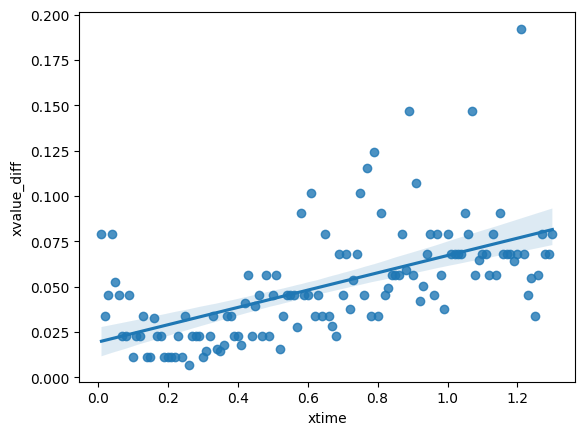

In [14]:
# Plot the max differences
sns.regplot(x='xtime', y='xvalue_diff', data=df_max_diff, scatter=True)

In [7]:
from utils import *

df_02_08 = df[(df['xtime'] >= 0.2) & (df['xtime'] <= 0.8)].copy()

df_ = add_fitted_slope(df_02_08)
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster

max_slope_sample_xtime = df_02_08.loc[df_02_08.groupby('Sample_Code')['fitted_slope'].idxmax()][['Batch', 'xtime']].set_index('Batch')['xtime']

values = np.array(max_slope_sample_xtime).reshape(-1, 1)
# Générer les liens entre les clusters
linked = linkage(values, 'ward')

KeyError: '[nan] not in index'